In [ ]:
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
100% 172k/172k [00:00<00:00, 383kB/s]
100% 172k/172k [00:00<00:00, 383kB/s]


In [ ]:
# Unzip the dataset (if needed)
import zipfile
with zipfile.ZipFile('/content/telco-customer-churn.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
DF=pd.read_csv('/content/telco-customer-churn.zip')

In [ ]:
DF.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
DF.shape

(7043, 21)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
DF.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
DF.duplicated().sum()

0

In [ ]:
DF.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
DF.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
DF.drop('customerID',axis=1,inplace=True)

In [ ]:
DF['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5901
1,1142


In [ ]:
DF['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


In [ ]:
cat_df=DF.select_dtypes(object)

In [ ]:
cat_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [ ]:
int_DF=DF.select_dtypes(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE=LabelEncoder()

In [ ]:
#le.fit_transform(DF["InternetService"])

array([0, 0, 0, ..., 0, 1, 1])

In [ ]:
for col in cat_df:
  LE=LabelEncoder()
  cat_df[col]=LE.fit_transform(cat_df[col])

In [ ]:
cat_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,925,1


In [ ]:
df=pd.concat([int_DF,cat_df],axis=1)

In [ ]:
df.head()

,SeniorCitizen,tenure,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,1,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
1,0,34,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466,0
2,0,2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157,1
3,0,45,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0
4,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,925,1


In [ ]:
df.shape

(7043, 19)

In [ ]:
X=df.drop(columns=['Churn'])

In [ ]:
Y=df['Churn'].values

In [ ]:
Y

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
#Y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train_fit = scaler.fit_transform(X_train)

In [ ]:
X_test_fit=scaler.fit_transform(X_test)

In [ ]:
X_train_fit

array([[-0.4397627 ,  1.61253221, -1.        , ..., -1.21465857,
         1.32662326,  0.92060524],
       [ 2.27395367, -0.7479074 , -1.        , ...,  0.82327662,
         0.39281573,  1.08361058],
       [-0.4397627 ,  1.57183498, -1.        , ..., -1.21465857,
        -1.47479932, -1.01640617],
       ...,
       [-0.4397627 ,  1.04277093,  1.        , ..., -1.21465857,
         1.32662326, -1.55464131],
       [ 2.27395367, -1.27697145,  1.        , ...,  0.82327662,
         0.39281573,  1.14711915],
       [-0.4397627 , -1.15487975, -1.        , ..., -1.21465857,
        -0.54099179,  1.66100933]])

In [ ]:
print(X_train.shape)

(5634, 18)


In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()

In [ ]:
#input_shape = (18,)


In [ ]:
input_shape = (X_train_fit.shape[1],)
model.add(Dense(11,activation='sigmoid',input_shape=input_shape))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 11)                  │             209 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 11)                  │              22 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,227 (4.80 KB)

 Trainable params: 519 (2.03 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 708 (2.77 KB)

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
history = model.fit(X_train_fit,Y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.6443 - loss: 0.6561 - val_accuracy: 0.7524 - val_loss: 0.5729
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7389 - loss: 0.5807 - val_accuracy: 0.7524 - val_loss: 0.5625
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7189 - loss: 0.5945 - val_accuracy: 0.7524 - val_loss: 0.5611
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7161 - loss: 0.5971 - val_accuracy: 0.7524 - val_loss: 0.5600
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7250 - loss: 0.5876 - val_accuracy: 0.7524 - val_loss: 0.5587
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7278 - loss: 0.5818 - val_accuracy: 0.7524 - val_loss: 0.5534
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7227 - loss: 0.5810 - val_accuracy: 0.7524 - val_loss: 0.5453
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7417 - loss: 0.5541 - val_accuracy: 0.7524 - 

In [ ]:
input_shape = (X_train.shape[1],)

In [ ]:
input_shape

(18,)

In [ ]:
y_pred=model.predict(X_test_fit)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
y_pred

array([[0.08226905],
       [0.09130891],
       [0.6327036 ],
       ...,
       [0.22377916],
       [0.32281646],
       [0.5756014 ]], dtype=float32)

In [ ]:
y_pred=y_pred.argmax(axis=-1)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
accuracy_score(Y_test,y_pred)

0.7388218594748048

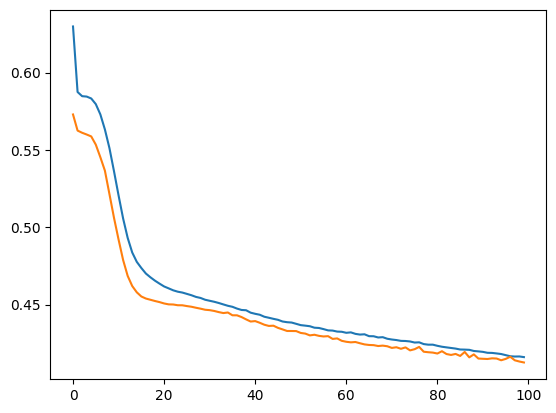

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

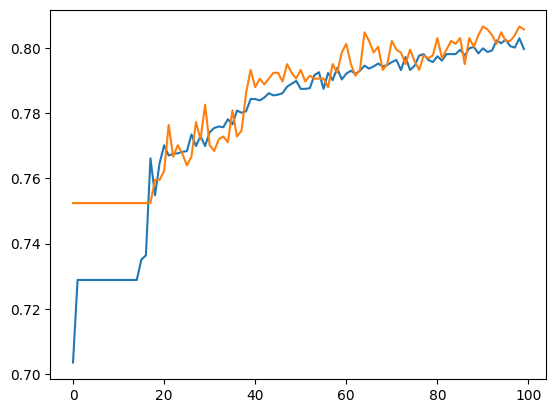

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])